In [5]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os

In [2]:
!pip install psycopg2

  Obtaining dependency information for psycopg2 from https://files.pythonhosted.org/packages/33/39/5a9a229bb5414abeb86e33b8fc8143ab0aecce5a7f698a53e31367d30caa/psycopg2-2.9.10-cp311-cp311-win_amd64.whl.metadata
  Using cached psycopg2-2.9.10-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached psycopg2-2.9.10-cp311-cp311-win_amd64.whl (1.2 MB)


In [7]:
# Establecer la conexión a la base de datos
def conectar_a_base_de_datos():
    conn_info = {
        "host": "localhost",  # Cambia esto si tu base no está en localhost
        "database": "Northwind",
        "user": "postgres",
        "password": os.getenv('ypass_psql'),
        "port": 5432  # Puerto por defecto
    }
    
    try:
        # Establecer conexión con la base de datos
        conn = psycopg2.connect(**conn_info)
        print("Conexión exitosa a la base de datos.")
        return conn
    except Exception as e:
        print(f"Error al conectar a la base de datos: {e}")
        return None

# Conectar a la base de datos
conn = conectar_a_base_de_datos()

Conexión exitosa a la base de datos.


In [8]:
# Consulta para obtener los datos de las tablas
def ejecutar_consulta(conn, query):
    return pd.read_sql_query(query, conn)

# Consultar datos de la tabla 'Customers'
query_customers = "SELECT * FROM Customers;"
customers_df = ejecutar_consulta(conn, query_customers)

# Consultar datos de la tabla 'Orders'
query_orders = "SELECT * FROM Orders;"
orders_df = ejecutar_consulta(conn, query_orders)

# Consultar datos de la tabla 'OrderDetails'
query_order_details = "SELECT * FROM OrderDetails;"
order_details_df = ejecutar_consulta(conn, query_order_details)

# Consultar datos de la tabla 'Products'
query_products = "SELECT * FROM Products;"
products_df = ejecutar_consulta(conn, query_products)

# Mostrar los primeros registros de cada tabla
customers_df.head(), orders_df.head(), order_details_df.head(), products_df.head()


C:\Users\YOSEPH\AppData\Local\Temp\ipykernel_28544\1217036873.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


(   customerid                        customername         contactname  \
 0           1                 Alfreds Futterkiste        Maria Anders   
 1           2  Ana Trujillo Emparedados y helados        Ana Trujillo   
 2           3             Antonio Moreno Taquería      Antonio Moreno   
 3           4                     Around the Horn        Thomas Hardy   
 4           5                  Berglunds snabbköp  Christina Berglund   
 
                          address         city postalcode  country  
 0                  Obere Str. 57       Berlin      12209  Germany  
 1  Avda. de la Constitución 2222  México D.F.       5021   Mexico  
 2                 Mataderos 2312  México D.F.       5023   Mexico  
 3                120 Hanover Sq.       London    WA1 1DP       UK  
 4                 Berguvsvägen 8        Luleå   S-958 22   Sweden  ,
    orderid  customerid  employeeid  orderdate  shipperid
 0    10248          90           5 1996-07-04          3
 1    10249          81

In [9]:
products_df.columns

Index(['productid', 'productname', 'supplierid', 'categoryid', 'unit',
       'price'],
      dtype='object')

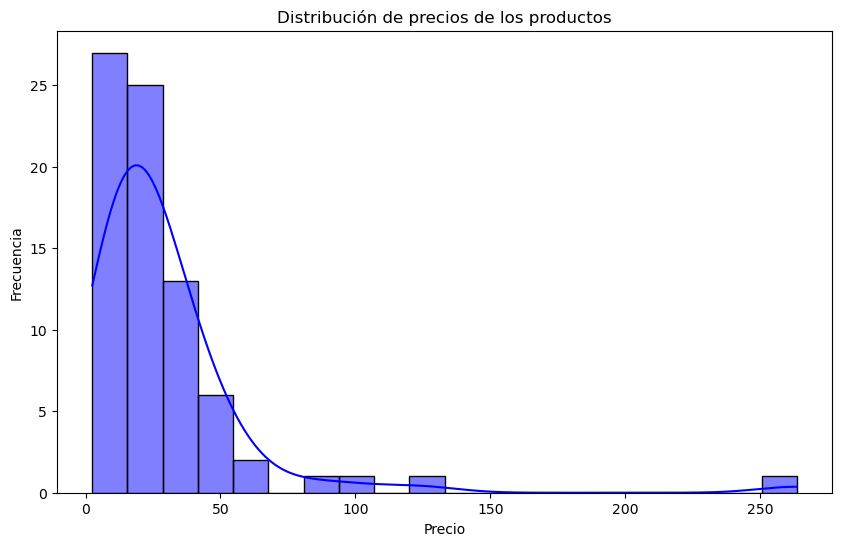

In [16]:
# Gráfico de distribución de precios de los productos
plt.figure(figsize=(10, 6))
sns.histplot(products_df['price'], kde=True, color='blue', bins=20)
plt.title('Distribución de precios de los productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


In [18]:
# Función para cerrar la conexión a la base de datos
def cerrar_conexion(conn):
    if conn:
        conn.close()
        print("\nConexión cerrada.")
        
# Cerrar la conexión
cerrar_conexion(conn)



Conexión cerrada.
